<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**План проекта**

**1. Подготовка данных**

- Загрузить данные из файла /datasets/Churn.csv и ознакомиться с ними.
- Привести наименования столбцов к нижнему регистру и змеиному стилю
- Произвести первичный анализ данных: проверить наличие пропусков, дубликатов, аномалий.
- Отобрать необходимые признаки для обучения модели и удалить ненужные.
- Преобразовать категориальные признаки (страна и пол) в числовые методом прямого кодирования (One-Hot Encoding).
- Разделить данные на обучающую, валидационную и тестовую выборки в соотношении 3:1:1.

**2. Исследование задачи**

- Изучить баланс классов целевого признака (факт ухода клиента).
- Обучить модель без учета дисбаланса классов и получить базовое значение метрики F1.
- Произвести анализ значимости признаков для модели.
- Борьба с дисбалансом

**3. Борьба с дисбалансом** 

- Использовать методы балансировки классов: взвешивание классов, увеличение выборки и сокращение выборки, а также их комбинации.
- Обучить различные модели (метод ближайших соседей, решающее дерево, случайный лес, логистическая регрессия, градиентный бустинг) с использованием методов балансировки классов и определить лучшую модель по значению метрики F1.
- Сравнить значения метрики F1 и AUC-ROC в лучшей модели с значениями в базовой модели и произвести анализ результатов.

**4.Тестирование модели**

- Проверить качество лучшей модели на тестовой выборке.
- Оценить значение метрики F1 и AUC-ROC на тестовой выборке.
- Произвести анализ полученных результатов и сделать выводы.

**Дополнительно можно провести дополнительные исследования, например:**

- Изучить зависимость оттока клиентов от различных признаков.
- Произвести интерпретацию результатов модели с помощью методов SHAP или LIME.


- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

**Целевым признаком является столбец `Exited` — факт ухода клиента**

## Подготовка данных

In [ ]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, auc, confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

**Настройка стилей и форматов вывода**

In [2]:
# настроим точность вывода до 2-х десятичных знаков и разделители тысяч (групп разрядов) для больших чисел
pd.set_option('display.float_format', '{:,.2f}'.format)

# установим графическую тему для графиков и гистограмм
plt.style.use('seaborn')

# настроим местоположение и размер шрифта для легенды и названий графиков и гистограмм
rcParams['legend.loc'] = 'upper left'
rcParams['legend.fontsize'] = 14
rcParams['axes.titlesize'] = 18



<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты и настройки на месте
</div>


**Объявление глобальных переменных**

In [3]:
## global seed ##
import random
rnd_state = 12345
np.random.seed(rnd_state)
random.seed(rnd_state)

In [4]:
#Наполним датасет 
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [5]:
#Посмотрим информацию о df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
#Посмотрим первые 5 строк df
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


In [7]:
# Получим статистическую информацию о числовых столбцах
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,"10,000.00","10,000.00","10,000.00","10,000.00","9,091.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"5,000.50","15,690,940.57",650.53,38.92,5.00,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,"2,886.90","71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,1.00,"15,565,701.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"2,500.75","15,628,528.25",584.00,32.00,2.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,"5,000.50","15,690,738.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,"7,500.25","15,753,233.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"10,000.00","15,815,690.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


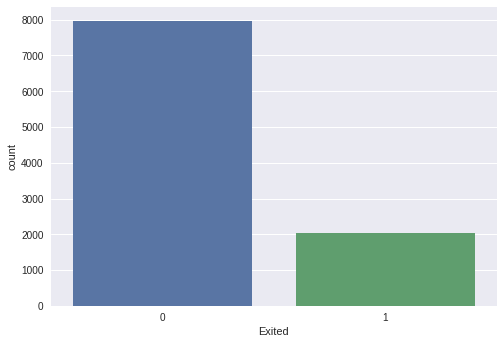

In [8]:
#Посмотрим рапределение по целевому признаку Exited
sns.countplot(x='Exited', data=df);

**Наименования столбцов**

In [9]:
#Посмотрим наименования столбцов
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
#Приведем столбцы к змеиному стилю
df = df.rename(columns={'RowNumber':'Row_Number', 'CustomerId':'Customer_Id', 'CreditScore':'Credit_Score',
       'NumOfProducts':'Num_Of_Products', 'HasCrCard':'Has_Cr_Card',
       'IsActiveMember':'Is_Active_Member', 'EstimatedSalary':'Estimated_Salary'})

In [11]:
#Переведем в нижний регистр
df.columns = df.columns.str.lower()

In [12]:
#Проверим результат
df.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

**Проверим пропуски**

In [13]:
#Проверим колличество пропусков в %
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
row_number,0.000000
customer_id,0.000000
surname,0.000000
credit_score,0.000000
geography,0.000000
gender,0.000000
age,0.000000
tenure,9.000000
balance,0.000000
num_of_products,0.000000


In [14]:
df['tenure'].describe()

count   9,091.00
mean        5.00
std         2.89
min         0.00
25%         2.00
50%         5.00
75%         7.00
max        10.00
Name: tenure, dtype: float64

In [15]:
#Оценим распределение
df['tenure'].value_counts().to_frame()

,tenure
1.00,952
2.00,950
8.00,933
3.00,928
5.00,927
7.00,925
4.00,885
9.00,882
6.00,881
10.00,446


Отметим, что имеются пропущенные значения в столбце Tenure, и для решения возможны несколько вариантов:

1. Заменить пропущенные значения на минимальное/среднее/медианное значение.
2. Разделить объекты с пропущенными значениями и без них на две группы и анализировать их отдельно.
3. Заполнить пропущенные значения с помощью интерполяции на основе имеющихся данных.
4. Исключить объекты с недостающими значениями, поскольку количество их незначительно (менее 10%).
5. Обратиться к источнику данных или специалистам для уточнения причины пропущенных значений и определения наиболее подходящего метода обработки.

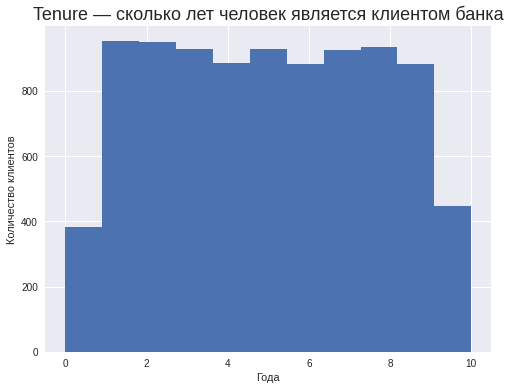

In [16]:
plt.title('Tenure — сколько лет человек является клиентом банка')
plt.xlabel('Года')
plt.ylabel('Количество клиентов')
df['tenure'].hist(figsize=(8,6), bins=11);

Судя по распределению: 
- 1 вариант не подойдёт, так как приведёт к пику в одной из категорий. 
- 2 вариант имеет место быть, но затратит лишнее время(которого и так не хватает). 
- 3 вариант нам подходит.  
- 4 вариант имеет место быть, но зачем, если есть третий вариант ? 
- 5 вариант, нам в данном случае не доступен. 

In [17]:
#используем метод interpolate() и добавим round(0) для округления до целого числа.
df['tenure'] = df['tenure'].interpolate().round(0)

In [18]:
#Оценим распределение
df['tenure'].value_counts().to_frame()

,tenure
6.00,1102
4.00,1079
2.00,1055
8.00,1036
5.00,1031
3.00,995
7.00,982
1.00,972
9.00,903
10.00,454


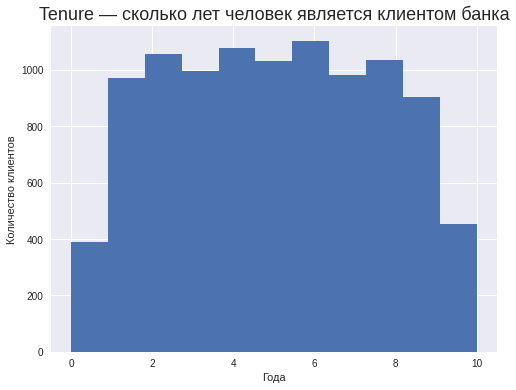

In [19]:
plt.title('Tenure — сколько лет человек является клиентом банка')
plt.xlabel('Года')
plt.ylabel('Количество клиентов')
df['tenure'].hist(figsize=(8,6), bins=11);

In [20]:
#Убедимся что все строки заполнены.
df['tenure'].describe()

count   10,000.00
mean         5.00
std          2.83
min          0.00
25%          3.00
50%          5.00
75%          7.00
max         10.00
Name: tenure, dtype: float64

**Проверим на Дубликаты**

In [21]:
#Количество дублирующихся строк
df.duplicated().sum()

0

In [22]:
#Проверим, нет ли повторов в идентификаторе клиента
df['customer_id'].duplicated().sum()

0

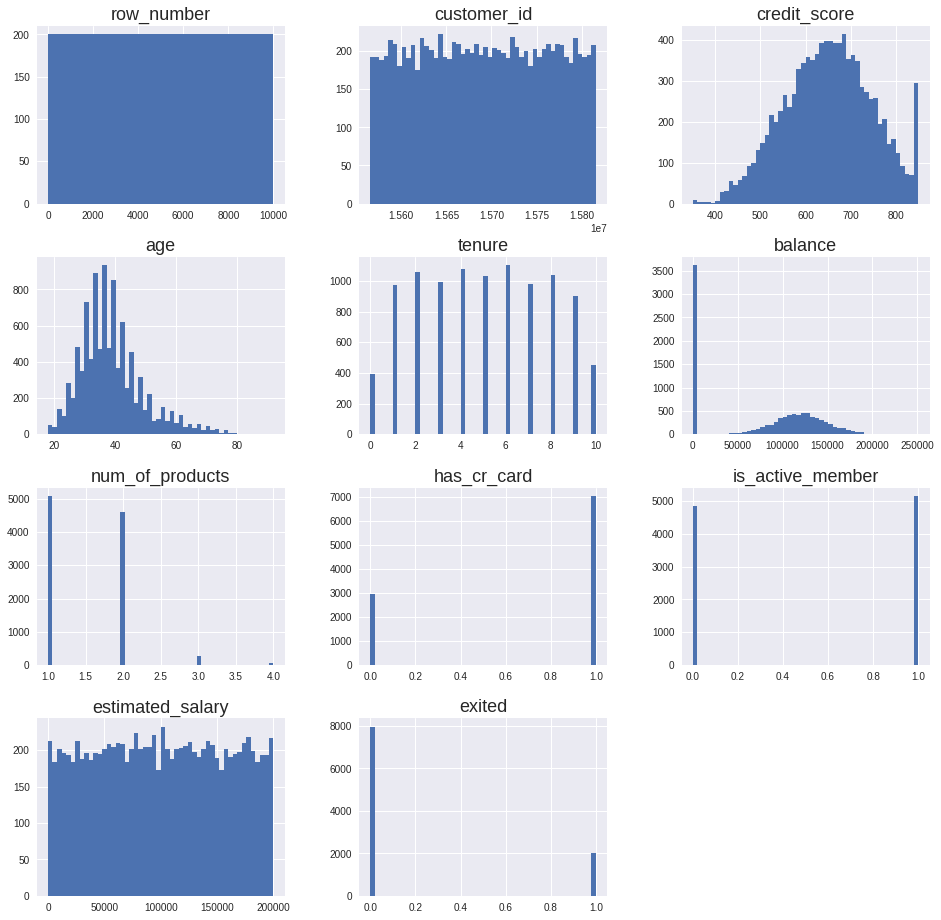

In [23]:
#Посмотрим распределение 
df.hist(figsize=(16,16), bins=50);

**Воспользуемся методом One-Hot Encoding(Прямое кодирование) для преобразования категориальных признаков в числовые**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [25]:
df['surname'].value_counts()

Smith      32
Scott      29
Martin     29
Walker     28
Brown      26
           ..
Geach       1
Cyril       1
Cambage     1
Burtch      1
McVey       1
Name: surname, Length: 2932, dtype: int64

- Информация в столбце RowNumber не является полезной для обучения модели, поскольку он просто дублирует информацию из стандартного датафрейма, поэтому его можно безболезненно убрать.  
- Столбец CustomerId является идентификатором пользователя и может быть удален, так как в нем нет дубликатов. 
- Столбец Surname содержит информацию о 2932 уникальных значениях, что затрудняет процесс моделирования, но не предоставляет полезной информации для обучения модели, поэтому он может быть исключен.

In [26]:
#поля row_number, customer_id и surname явно лишние. Удаляем.
df.drop(columns=['row_number', 'customer_id', 'surname'], inplace=True)

In [27]:
#посмотрим уникальные значения поля
df['geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [28]:
#посмотрим уникальные значения поля
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [29]:
#Используем функцию get_dummies():
df_encoded = pd.get_dummies(df, columns=['geography', 'gender'], drop_first=True)

In [30]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  float64
 3   balance            10000 non-null  float64
 4   num_of_products    10000 non-null  int64  
 5   has_cr_card        10000 non-null  int64  
 6   is_active_member   10000 non-null  int64  
 7   estimated_salary   10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_Germany  10000 non-null  uint8  
 10  geography_Spain    10000 non-null  uint8  
 11  gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


In [31]:
#Приведем новые столбцы к змеиному стилю
df_encoded = df_encoded.rename(
    columns={'geography_France':'geography_france', 'geography_Germany':'geography_germany', 'geography_Spain':'geography_spain', 'gender_Female':'gender_female', 'gender_Male':'gender_male'})

In [32]:
#проверим что получилось
df_encoded.columns

Index(['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
       'has_cr_card', 'is_active_member', 'estimated_salary', 'exited',
       'geography_germany', 'geography_spain', 'gender_male'],
      dtype='object')

In [33]:
df_encoded.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_germany,geography_spain,gender_male
0,619,42,2.00,0.00,1,1,1,"101,348.88",1,0,0,0
1,608,41,1.00,"83,807.86",1,0,1,"112,542.58",0,0,1,0
2,502,42,8.00,"159,660.80",3,1,0,"113,931.57",1,0,0,0
3,699,39,1.00,0.00,2,0,0,"93,826.63",0,0,0,0
4,850,43,2.00,"125,510.82",1,1,1,"79,084.10",0,0,1,0


In [34]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  float64
 3   balance            10000 non-null  float64
 4   num_of_products    10000 non-null  int64  
 5   has_cr_card        10000 non-null  int64  
 6   is_active_member   10000 non-null  int64  
 7   estimated_salary   10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_germany  10000 non-null  uint8  
 10  geography_spain    10000 non-null  uint8  
 11  gender_male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


**Разобьём данные на выборки**

In [35]:
# Разделение исходных данных на признаки (X) и целевую переменную (y)
X = df_encoded.drop('exited', axis=1)
y = df_encoded['exited']

In [36]:
# Разделение данных на обучающую, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=rnd_state)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=rnd_state)

**Проверим правильность разделения:**

In [37]:
# посмотрим размерность (форму) массивов `X_train` и `X_temp
X_train.shape, X_temp.shape

((6000, 11), (4000, 11))

In [38]:
# проверим пересечение индексов
set(X_train.index) & set(X_temp.index)

set()

In [39]:
# проверим пересечение индексов
set(X_valid.index) & set(X_test.index)

set()

In [40]:
# Размеры выборок
print(f"Размер выборки обучающей выборки = {100*len(X_train)/len(df):.4f}%")
print(f"Размер валидационной выборки = {100*len(X_valid)/len(df):.4f}%")
print(f"Размер тестовой выборки = {100*len(X_test)/len(df):.4f}%")

Размер выборки обучающей выборки = 60.0000%
Размер валидационной выборки = 20.0000%
Размер тестовой выборки = 20.0000%


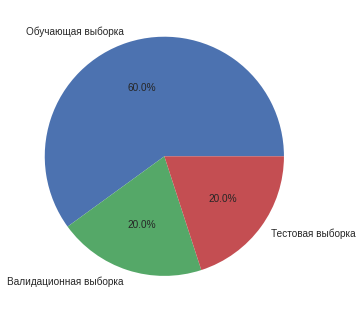

In [41]:
# Посмотрим в виде пирога
labels = ['Обучающая выборка', 'Валидационная выборка', 'Тестовая выборка']
sizes = [len(X_train)/len(df), len(X_valid)/len(df), len(X_test)/len(df)]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()

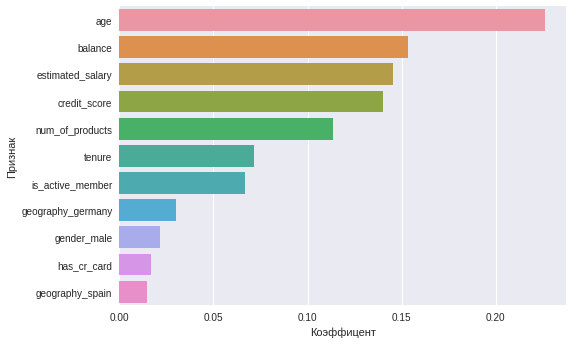

In [42]:
#Проверим важность признаков(насколько он влияет на предсказание модели) 
rfc = DecisionTreeClassifier().fit(X_train, y_train)
df_feature_importances = pd.DataFrame(((zip(X, rfc.feature_importances_)))).rename(columns={0:"Признак",1:"Коэффицент"}).sort_values(by="Коэффицент", ascending = False )
sns.barplot(data=df_feature_importances, x=df_feature_importances["Коэффицент"], y=df_feature_importances["Признак"]);

*Согласно графику важности признаков, возраст является самым значимым фактором с коэффициентом около 23, за ним снижающимся порядком значимости с коэффициентами от 16 до 15 следуют кредитный рейтинг, баланс на счете и ожидаемая зарплата. Затем с коэффициентом 13 идет количество продуктов банка, которые использует клиент. Кроме того, на прогноз также влияет активность клиента и продолжительность его работы с банком, но наличие кредитной карты, географическое положение и пол почти не влияют на предсказания, их коэффициенты сокращаются с 3,5 до почти 0.*

**Но так ли это на самом деле?**

In [43]:
X_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
7479,567,35,8.00,"153,137.74",1,1,0,"88,659.07",0,1,1
3411,711,37,8.00,"113,899.92",1,0,0,"80,215.20",0,0,0
6027,850,44,3.00,"140,393.65",2,0,1,"186,285.52",1,0,1
1247,512,24,6.00,0.00,2,1,0,"37,654.31",0,0,1
3716,665,27,2.00,"147,435.96",1,0,0,"187,508.06",1,0,0


**Приведём объекты выборок к единому масштабу**

In [44]:
#Для масштабирования методом scaler зафиксируем численные признаки
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

In [45]:
#Создадим объект scaler и настроим его на обучающих данных. 
#Настройка — это вычисление среднего и дисперсии 
scaler = StandardScaler()
scaler.fit(X_train[numeric])

StandardScaler()

In [46]:
X_train = X_train.copy()
X_train[numeric] = scaler.transform(X_train[numeric])
#X_train.reset_index(drop=True, inplace=True)  # Сбросить индексы
X_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
7479,-0.89,-0.37,1.05,1.23,-0.89,1,0,-0.19,0,1,1
3411,0.61,-0.18,1.05,0.60,-0.89,0,0,-0.33,0,0,0
6027,2.05,0.48,-0.72,1.03,0.83,0,1,1.50,1,0,1
1247,-1.46,-1.42,0.34,-1.23,0.83,1,0,-1.07,0,0,1
3716,0.13,-1.13,-1.07,1.14,-0.89,0,0,1.52,1,0,0


In [47]:
X_valid = X_valid.copy()
X_valid[numeric] = scaler.transform(X_valid[numeric])
#X_valid.reset_index(drop=True, inplace=True)  # Сбросить индексы
X_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
8532,-0.70,-0.37,-1.07,-1.23,0.83,1,0,-0.02,0,0,0
5799,-0.28,0.58,-0.72,-1.23,-0.89,1,1,1.47,0,0,0
5511,0.15,-0.66,-1.78,0.44,-0.89,1,0,-1.37,1,0,1
7365,-0.88,-0.28,1.76,1.24,-0.89,1,1,-0.79,0,1,0
7367,-0.48,0.29,1.76,-1.23,0.83,1,0,1.36,0,1,1


In [48]:
X_test = X_test.copy()
X_test[numeric] = scaler.transform(X_test[numeric])
#X_test.reset_index(drop=True, inplace=True)  # Сбросить индексы
X_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
7041,-2.23,-0.09,-1.07,-1.23,0.83,1,0,0.65,0,0,1
5709,-0.09,0.01,1.41,-1.23,-0.89,1,0,-1.66,0,0,0
7117,-0.92,-0.75,-0.01,0.72,-0.89,1,1,-1.37,0,1,1
7775,-0.25,0.10,1.76,-1.23,0.83,1,0,0.08,0,1,1
8735,0.79,-0.85,1.76,0.62,-0.89,0,1,-1.07,0,0,1


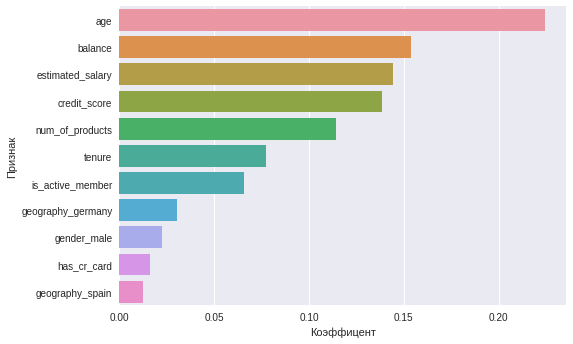

In [49]:
#Проверим важность признаков(возможно будут изменения) 
rfc2 = DecisionTreeClassifier().fit(X_train, y_train)
df_feature_importances = pd.DataFrame(((zip(X, rfc2.feature_importances_)))).rename(columns={0:"Признак",1:"Коэффицент"}).sort_values(by="Коэффицент", ascending = False )
sns.barplot(data=df_feature_importances, x=df_feature_importances["Коэффицент"], y=df_feature_importances["Признак"]);

*Изменения наблюдаются, но не существенные*

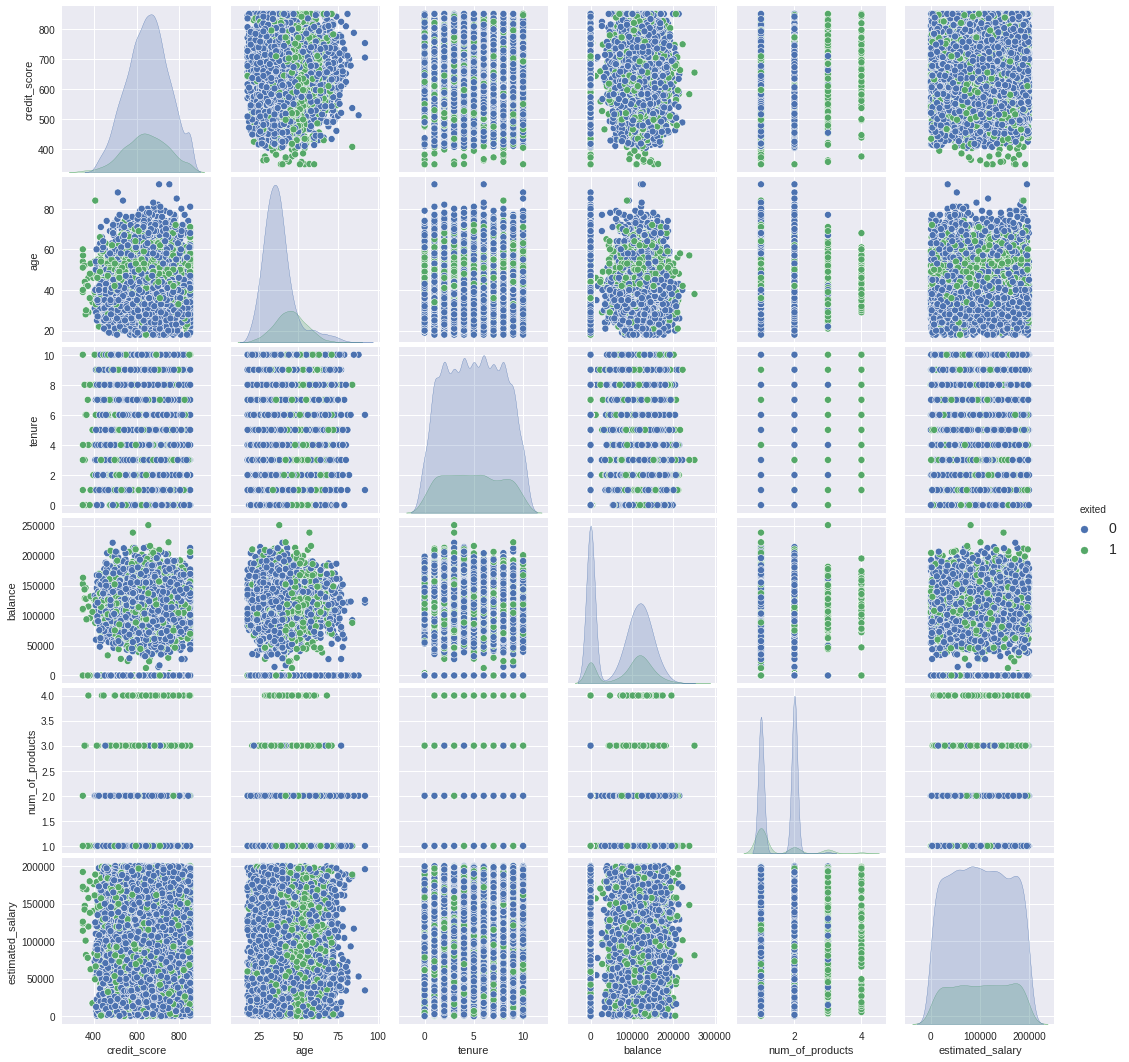

In [50]:
#построи графики попарных зависимостей
list_columns = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary', 'exited']
sns.pairplot(df[list_columns], hue='exited');

*Среди ушедших клиентов преобладают люди в возрасте от 40 до 60 лет, которые также использовали более двух банковских продуктов. Кроме того, наблюдается ненормальное распределение данных. Давайте проведем анализ корреляции по методу Спирмена с использованием тепловой карты.*


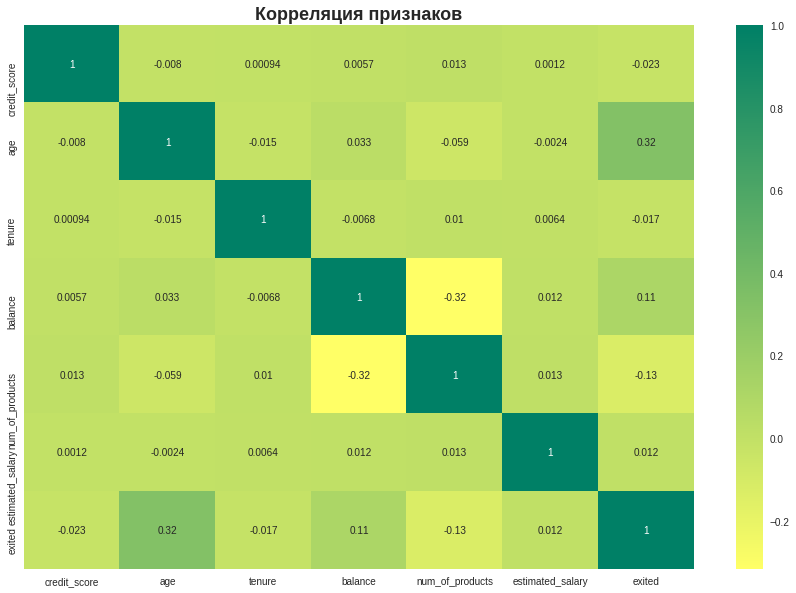

In [51]:
# создадим список заголовков столбцов количественных признаков
list_numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

# построим тепловую карту корреляции признаков
plt.figure(figsize=(15, 10))
plt.title('Корреляция признаков', weight = 'bold')
sns.heatmap(df[list_columns].corr(method='spearman'), annot = True, cmap='summer_r')
plt.show()

*Никакой явной зависимости не наблюдается.*

**Вывод**
 
Таблица имеет:  
- 10000 строк и 14 столбцов(расшифровка столбцов выше)
- Проверили распределение по целевому признаку, оно составило 4 к 1 
- Наименовани столбцов приведено к змеиному регистру
- Имели место пропущенные данные в столбце `Tenure`, скорректировано методом interpolate()
- Дубликатов не обнаружено
- Удалены столбцы `RowNumber`, `CustomerId`, `Surname`
- Категорийные признаки по столбцам Geography и Gender преобразованы методом One-Hot Encoding(Прямое кодирование)
- исходные данные разделены на обучающую (train), валидационную (validation) и тестовую (test) выборки в заданном соотношении (например, 60% - 20% - 02%).
- Данные разделены случайным образом и не пересекаются между разными выборками.
- Ключевые признаки для предсказания `age`, `credit_score`, `estimated_salary`, `balance` и `num_of_products`
- Среди ушедших клиентов преобладают люди в возрасте от 40 до 60 лет, которые также использовали более двух банковских продуктов. 
- При анализе корреляции по методу Спирмена, никакой явной зависимости не наблюдается.

## Исследование задачи

*Как было установлено в нашей выборке, около 80% ответов являются отрицательными, в то время как примерно 20% ответов положительны. Можно уверенно утверждать, что в выборке наблюдается дисбаланс.*

**Проверим качество моделей до борьбы с дисбалансом**

In [52]:
#Напишем функцию для изучия полноты, точности и F1-меры
def rec_prec_f1(y_valid, prediction):
    print("Полнота:" , recall_score(y_valid, prediction))
    print("Точность:", precision_score(y_valid, prediction))
    #print("F1-мера:", f1_score(y_valid, prediction))

In [53]:
#Напишем функцию для исследования вычисления AUC-ROC и сравнения его значения с F1-мерой
def auc_roc_vs_f1(y_true, y_pred_prob, threshold=0.5):
    # Вычисляем AUC-ROC
    auc_roc = roc_auc_score(y_true, y_pred_prob)
    print(f"AUC-ROC: {auc_roc}")

    # Преобразуем вероятности в бинарные предсказания с помощью заданного порога
    y_pred = [1 if prob >= threshold else 0 for prob in y_pred_prob]

    # Вычисляем F1-меру
    f1 = f1_score(y_true, y_pred)
    print(f"F1-мера: {f1}")

    # Сравниваем AUC-ROC с F1-мерой
    if auc_roc > f1:
        print("AUC-ROC выше F1-меры")
    elif auc_roc < f1:
        print("F1-мера выше AUC-ROC")
    else:
        print("AUC-ROC равна F1-мере")

In [54]:
#По средством функции calculate_model_accuracy, проверим точность моделей.
def calculate_model_accuracy(X_train, y_train, X_valid, y_valid):
    model_DTC = DecisionTreeClassifier(random_state=rnd_state)
    model_DTC.fit(X_train, y_train)
    DTC_predicted = model_DTC.predict(X_valid)
    probabilities_valid_DTC = model_DTC.predict_proba(X_valid)
    probabilities_one_valid_DTC = probabilities_valid_DTC[:, 1]
    print("Дерево решений:")
    rec_prec_f1(y_valid, DTC_predicted)
    auc_roc_vs_f1(y_valid, probabilities_one_valid_DTC)
    print()
    
    model_RFC = RandomForestClassifier(max_depth=15, n_estimators=100, min_samples_leaf=5, random_state=rnd_state)
    model_RFC.fit(X_train, y_train)
    RFC_predicted = model_RFC.predict(X_valid)
    probabilities_valid_RFC = model_RFC.predict_proba(X_valid)
    probabilities_one_valid_RFC = probabilities_valid_RFC[:, 1]
    print("Случайный лес:")
    rec_prec_f1(y_valid, RFC_predicted)
    auc_roc_vs_f1(y_valid, probabilities_one_valid_RFC)
    print()
    
    model_LgR = LogisticRegression(solver = 'liblinear')
    model_LgR.fit(X_train, y_train)
    LgR_predicted = model_LgR.predict(X_valid)
    probabilities_valid_LgR = model_LgR.predict_proba(X_valid)
    probabilities_one_valid_LgR = probabilities_valid_LgR[:, 1]
    print("Логистическая регрессия:")
    rec_prec_f1(y_valid, LgR_predicted)
    auc_roc_vs_f1(y_valid, probabilities_one_valid_LgR)

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Добавил функцию auc_roc_vs_f1 для исследования AUC-ROC, немного дополнил функцию calculate_model_accuracy и убрал лишний вывод F1-меры из функции rec_prec_f1
</div>

In [55]:
calculate_model_accuracy(X_train, y_train, X_valid, y_valid)

Дерево решений:
Полнота: 0.49521531100478466
Точность: 0.5061124694376528
AUC-ROC: 0.6837644190927842
F1-мера: 0.5006045949214026
AUC-ROC выше F1-меры

Случайный лес:
Полнота: 0.44258373205741625
Точность: 0.8114035087719298
AUC-ROC: 0.8495635710353922
F1-мера: 0.5727554179566564
AUC-ROC выше F1-меры

Логистическая регрессия:
Полнота: 0.23684210526315788
Точность: 0.5625
AUC-ROC: 0.7588178007367574
F1-мера: 0.3333333333333333
AUC-ROC выше F1-меры


*В ходе исследования были оценены три модели: Дерево решений, Случайный лес и Логистическая регрессия. Были измерены значения полноты, точности и F1-меры для каждой модели.*

**Анализируя результаты, можно сделать следующие выводы:**
- Случайный лес показал наивысшую точность среди трех моделей. Однако, его полнота ниже по сравнению с деревом решений, что может говорить о неправильной классификации некоторых положительных примеров.
- Дерево решений имеет средние значения полноты, точности и F1-меры, что говорит о разумном балансе между полнотой и точностью.
- Логистическая регрессия показала самые низкие значения полноты, точности и F1-меры, что может указывать на то, что данная модель не является наилучшим выбором для данной задачи.

*По итогам исследования, для дальнейшего изучения, буду использовать модель Случайного леса, исходя из ее наилучшего значения точности, хотя полнота модели все же требует дополнительной работы.*

## Борьба с дисбалансом

*Для преодоления дисбаланса классов в выборке, в которой около 80% отрицательных ответов и примерно 20% положительных, мы можем предпринять два подхода. Первый подход заключается в увеличении количества положительных ответов в четыре раза, чтобы достичь баланса классов. Альтернативный подход заключается в уменьшении количества отрицательных ответов.*

*Для реализации первого подхода мы разделим обучающую выборку на отрицательные и положительные объекты. Затем мы сделаем несколько копий положительных объектов. Используя эти данные, мы сформируем новую обучающую выборку. Чтобы избежать влияния последовательных повторяющихся вопросов на обучение, мы перемешаем данные.*

*После этого мы сможем обучить новые модели на скорректированной выборке, которая теперь будет содержать балансированные классы.*

In [56]:
#Создадим функцию для увеличения представленной класса в выборке 
def upsample(features, target, repeat, upsampled_сlass):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    if upsampled_сlass == 0:
        features_upsampled = pd.concat([features_zeros]* repeat + [features_ones] )
        target_upsampled = pd.concat([target_zeros]* repeat + [target_ones] )
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=rnd_state)
        
    elif upsampled_сlass == 1:
        features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
        target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
        features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=rnd_state)
    else:
        features_upsampled = 0
        target_upsampled = 0  
       
    return features_upsampled, target_upsampled

In [57]:
#Создадим функцию для уменьшения представленной класса в выборке 
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=rnd_state)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=rnd_state)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=rnd_state)
    
    return features_downsampled, target_downsampled

0   0.50
1   0.50
Name: exited, dtype: float64
(9588,)


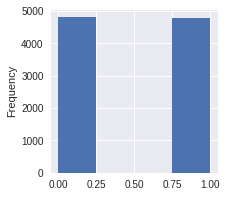

In [58]:
#Применим функцию upsample, увеличив количество положительных ответов в 4 раза
features_train_upsampled, target_train_upsampled = upsample(X_train, y_train, 4, 1)
target_train_upsampled.plot(kind ='hist', bins=4, figsize=(3,3));
print(target_train_upsampled.value_counts(normalize = 1))
print(target_train_upsampled.shape)

1   0.55
0   0.45
Name: exited, dtype: float64
(2157,)


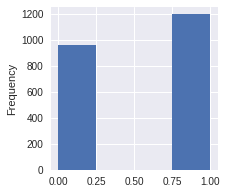

In [59]:
#Применим функцию downsample, уменьшим количество пооложительных ответов в 4 раза
features_train_downsampled, target_train_downsampled = downsample(X_train, y_train, 0.2)
target_train_downsampled.plot(kind ='hist', bins=4, figsize=(3,3));
print(target_train_downsampled.value_counts(normalize = 1))
print(target_train_downsampled.shape)

*Результаты Upsample выглядит идеально, с ним мы и будем работать.*

In [60]:
#Проверим точность моделей на сбалансированной выборке
calculate_model_accuracy(features_train_upsampled, target_train_upsampled, X_valid, y_valid)

Дерево решений:
Полнота: 0.49760765550239233
Точность: 0.5024154589371981
AUC-ROC: 0.6836963688384274
F1-мера: 0.5
AUC-ROC выше F1-меры

Случайный лес:
Полнота: 0.6746411483253588
Точность: 0.5862785862785863
AUC-ROC: 0.8475281123161887
F1-мера: 0.6273637374860958
AUC-ROC выше F1-меры

Логистическая регрессия:
Полнота: 0.6818181818181818
Точность: 0.38
AUC-ROC: 0.7637113701389434
F1-мера: 0.488013698630137
AUC-ROC выше F1-меры


*Сравнивая прогресс между первой и второй выборками, можно сделать следующие выводы:*

1. Дерево решений:
   - Полнота: незначительное улучшение с 0.4952 до 0.4976
   - Точность: незначительное снижение с 0.5061 до 0.5024
   - AUC-ROC: остался примерно таким же 0.6838 в первой выборке против 0.6837 во второй выборке
   - F1-мера: незначительное снижение с 0.5006 до 0.5000
   
   Дерево решений не показало значительного прогресса между двумя выборками. Показатели модели остались практически неизменными.

2. Случайный лес:
   - Полнота: значительно выросла с 0.4426 до 0.6746
   - Точность: умеренно снизилась с 0.8114 до 0.5863
   - AUC-ROC: незначительное снижение с 0.8496 до 0.8475 
   - F1-мера: незначительно выросла с 0.5728 до 0.6274 
   
   Модель случайного леса показывает заметный прогресс в предсказательной способности между двумя выборками. Полнота увеличилась, что означает, что модель лучше обнаруживает положительные случаи. Однако, точность снизилась, что может быть связано с увеличением ложных срабатываний. Общая разделяющая способность модели (AUC-ROC) осталась примерно одинаковой.

3. Логистическая регрессия:
   - Полнота: значительно выросла с 0.2368 до 0.6818 
   - Точность: существенно снизилась с 0.5625 до 0.38
   - AUC-ROC: незначительное улучшение с 0.7588 до 0.7637 
   - F1-мера: существенно выросла с 0.3333 до 0.4880 
   
   Модель логистической регрессии также показывает значительный прогресс в предсказательной способности между двумя выборками. Полнота увеличилась, что указывает на лучшую способность обнаруживать положительные случаи. Однако, точность снизилась, что может быть связано с увеличением ложных срабатываний. Значение F1-меры также выросло. Общая разделяющая способность модели (AUC-ROC) осталась примерно одинаковой.

**Общий вывод: Вторая выборка показывает некоторое улучшение производительности моделей в сравнении с первой выборкой. Некоторые модели показали улучшение полноты и F1-меры, хотя точность может снижаться. Лучший результат достигнут с помощью модели "Случайный лес" на валидационной выборке, где удалось достичь F1-меры = 0.6274, что превышает целевую задачу исследования. AUC-ROC остался примерно таким же как и в первый раз.**

## Тестирование модели

In [ ]:
#Напишем функцию для определения лучших параметров с использованием Pipeline и RandomizedSearchCV
def find_best_params(X_train, y_train):
    # Создание pipeline
    pipeline = Pipeline([
        ('model', RandomForestClassifier())
    ])

    # Задание параметров для RandomizedSearchCV
    param_grid = {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [3, 5, 10, 15, 20],
        # добавьте другие параметры модели, которые вы хотите оценить
    }

    # Задание RandomizedSearchCV с метриками F1-мера и ROC-AUC
    random_search = RandomizedSearchCV(pipeline, 
                                       param_distributions=param_grid, 
                                       n_iter=10, 
                                       scoring={'f1': 'f1', 'roc_auc': 'roc_auc'}, 
                                       refit='f1',
                                       cv=5, 
                                       verbose=5, 
                                       random_state=rnd_state)

    # Поиск лучших параметров
    random_search.fit(X_train, y_train)

    # Вывод лучших параметров и результатов оценивания
    print('Лучшие параметры:', random_search.best_params_)
    print('Лучшая F1-мера:', random_search.best_score_)

    return random_search.best_params_

In [ ]:
best_params = find_best_params(features_train_upsampled, target_train_upsampled)

*Произведём предсказание нашей лучшей модели на тестовой выборке. Оценим результаты тестирования по полученным значениям F1-меры и ROC-AUC.*

In [61]:
#Обучим финальную модель
model_RFC_final = RandomForestClassifier(
    bootstrap = True, class_weight='balanced', max_depth=15, max_features='auto',  n_estimators=100, random_state=rnd_state)
model_RFC_final.fit(features_train_upsampled, target_train_upsampled)
model_RFC_final_prediction = model_RFC_final.predict(X_test)

In [62]:
#тестовые значения полноты, точности и F1-меры,
rec_prec_f1(y_test, model_RFC_final_prediction)

Полнота: 0.574468085106383
Точность: 0.6445623342175066


Полнота: 0.574468085106383
Точность: 0.6445623342175066

*Построим кривую ROC-AUC и сравним её с моделью, которая случайно выбирает класс (на графике будет как прямая линия).*

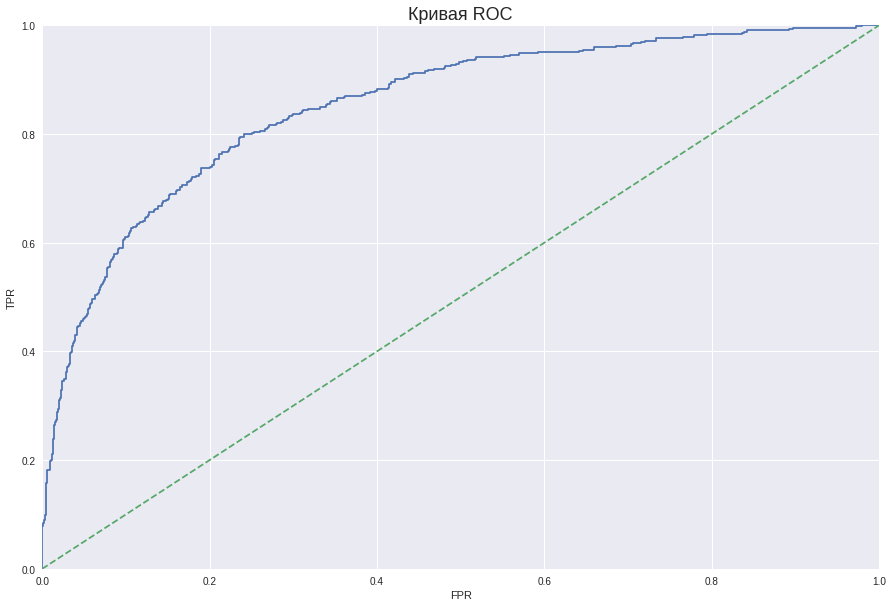

auc_roc = 0.8525981492224965


In [63]:
probabilities = model_RFC_final.predict_proba(X_test)
probabilities_one_valid = probabilities[:,1]
auc_roc = roc_auc_score(y_test, probabilities_one_valid)
fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)
plt.figure(figsize=(15, 10))
plt.step(fpr, tpr, where='post')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Кривая ROC')
plt.show()
print('auc_roc =', auc_roc)

Финальная модель показывает результаты лучше, чем случайная модель — модель можно считать адекватной.
AUC-ROC финальной модели: 0.8525981492224965

**Выводы:**
- В первоначальных данных наблюдался значительный дисбаланс, из-за чего обученные на этих данных модели не проходили проверку на адекватность. Все модели не первоначальных данных не смогли достичь целевого показателя F1.
- Разобрали несколько методов борьбы с дисбалансом
- Дисбаланс был устранен с использованием метода upsampled
- Повторное обучение на сбалансированной выборке показало некоторое улучшение производительности моделей в сравнении с несбалансированной выборкой. Некоторые модели показали улучшение полноты и F1-меры. 
- Лучший результат достигнут с помощью модели "Случайный лес" на валидационной выборке, где удалось достичь F1-меры = 0.6274, что превышает целевую задачу исследования.
- Финальная модель показывает результаты лучше, чем случайная модель — модель можно считать адекватной. AUC-ROC финальной модели: 0.8525981492224965


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*